## Alzheimer's Disease Prediction

Studi kasus:
* Melakukan EDA terhadap dataset penyakit Alzheimer
* Membuat pemodelan untuk klasifikasi penyakit Alzheimer

Dataset source: https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Import dataset**

In [2]:
alzheimer_df = pd.read_csv("alzheimers_prediction_dataset.csv")
alzheimer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [3]:
alzheimer_df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


In [4]:
alzheimer_df.describe(exclude=np.number).T

,count,unique,top,freq
Country,74283,20,Brazil,3839
Gender,74283,2,Female,37249
Physical Activity Level,74283,3,High,24853
Smoking Status,74283,3,Current,24915
Alcohol Consumption,74283,3,Never,24865
Diabetes,74283,2,No,59527
Hypertension,74283,2,No,52134
Cholesterol Level,74283,2,Normal,51973
Family History of Alzheimer’s,74283,2,No,52004
Depression Level,74283,3,Medium,24843


### Exploratory Data Analysis (EDA)

**Data numerik**

In [5]:
numeric_df = alzheimer_df.select_dtypes(include=np.number)
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   74283 non-null  int64  
 1   Education Level       74283 non-null  int64  
 2   BMI                   74283 non-null  float64
 3   Cognitive Test Score  74283 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.3 MB


Memeriksa apakah ada outlier atau tidak

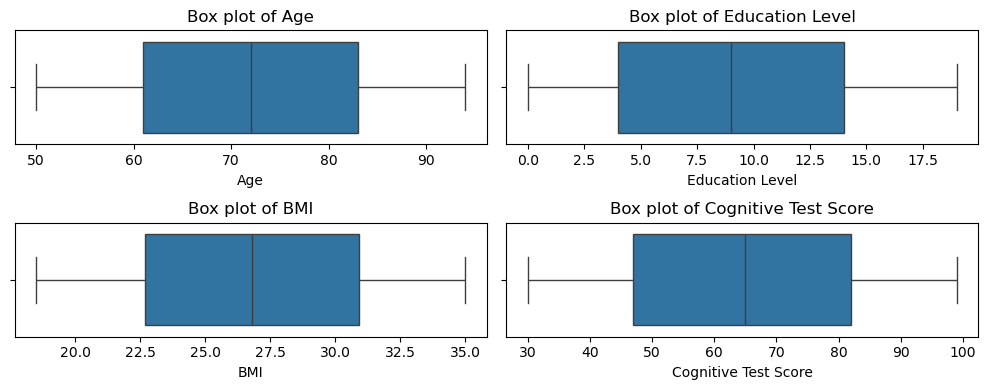

In [6]:
plt.figure(figsize=[10, 4])

for i, column in enumerate(numeric_df, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=alzheimer_df[column])
    plt.title("Box plot of {}".format(column))

plt.tight_layout()
plt.show()

Berdasarkan visualisas di atas, semua kolom numerik bersih dari outlier

Mencari korelasi antara setiap kolom numerik dengan kolom "Alzheimer’s Diagnosis"

In [7]:
for_correlation_df = pd.concat([numeric_df, alzheimer_df["Alzheimer’s Diagnosis"]], axis=1)
for_correlation_df["AD"] = np.where(for_correlation_df["Alzheimer’s Diagnosis"] == "Yes", 1, 0)
for_correlation_df.drop("Alzheimer’s Diagnosis", axis=1, inplace=True)
for_correlation_df.head()

,Age,Education Level,BMI,Cognitive Test Score,AD
0,90,1,33.0,90,0
1,72,7,29.9,65,0
2,86,19,22.9,43,0
3,53,17,31.2,81,0
4,58,3,30.0,49,0


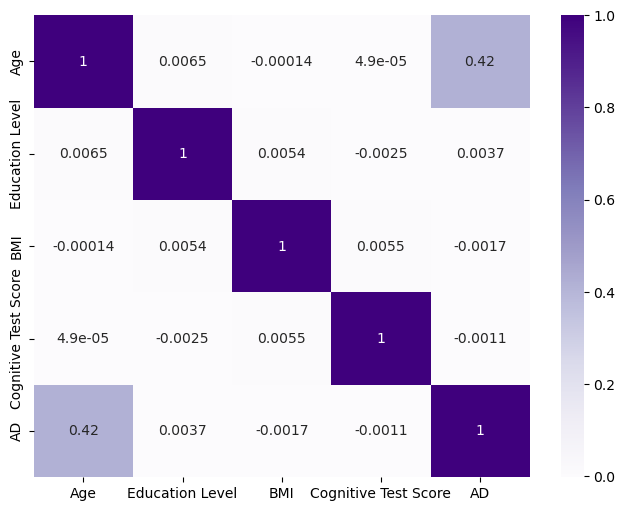

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(for_correlation_df.corr(), annot=True, cmap="Purples")
plt.show()

* Berdasarkan visualisasi matriks korelasi, tidak ada korelasi berarti antara kolom-kolom numerik terhadap kolom "Alzheimer’s Diagnosis"
* Nilai korelasi antara kolom "Age" terhadap kolom "Alzheimer’s Diagnosis" mendekati 0.5, lebih besar dibandingkan kolom-kolom numerik lainnya

**Data kategorikal**

In [9]:
categorical_df = alzheimer_df.drop(numeric_df, axis=1)
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Country                               74283 non-null  object
 1   Gender                                74283 non-null  object
 2   Physical Activity Level               74283 non-null  object
 3   Smoking Status                        74283 non-null  object
 4   Alcohol Consumption                   74283 non-null  object
 5   Diabetes                              74283 non-null  object
 6   Hypertension                          74283 non-null  object
 7   Cholesterol Level                     74283 non-null  object
 8   Family History of Alzheimer’s         74283 non-null  object
 9   Depression Level                      74283 non-null  object
 10  Sleep Quality                         74283 non-null  object
 11  Dietary Habits              

Selanjutnya, dilakukan Exporatory Data Analysis (EDA) terhadap fitur (kolom-kolom) kategorikal pada data-data orang yang terdiagnosis Alzheimer (nilai kolom "Alzheimer’s Diagnosis" = "Yes"), untuk mengetahui apakah ada tren tertentu pada orang-orang yang terdiagnosis.

In [10]:
categorical_df_positive = categorical_df[categorical_df["Alzheimer’s Diagnosis"] == "Yes"]
categorical_positive_dicts = dict()

for i, column in enumerate(categorical_df_positive, 1):
    if column != "Country" and column != "Alzheimer’s Diagnosis":
        item = categorical_df[column].value_counts().to_dict()
        categorical_positive_dicts[column] = item

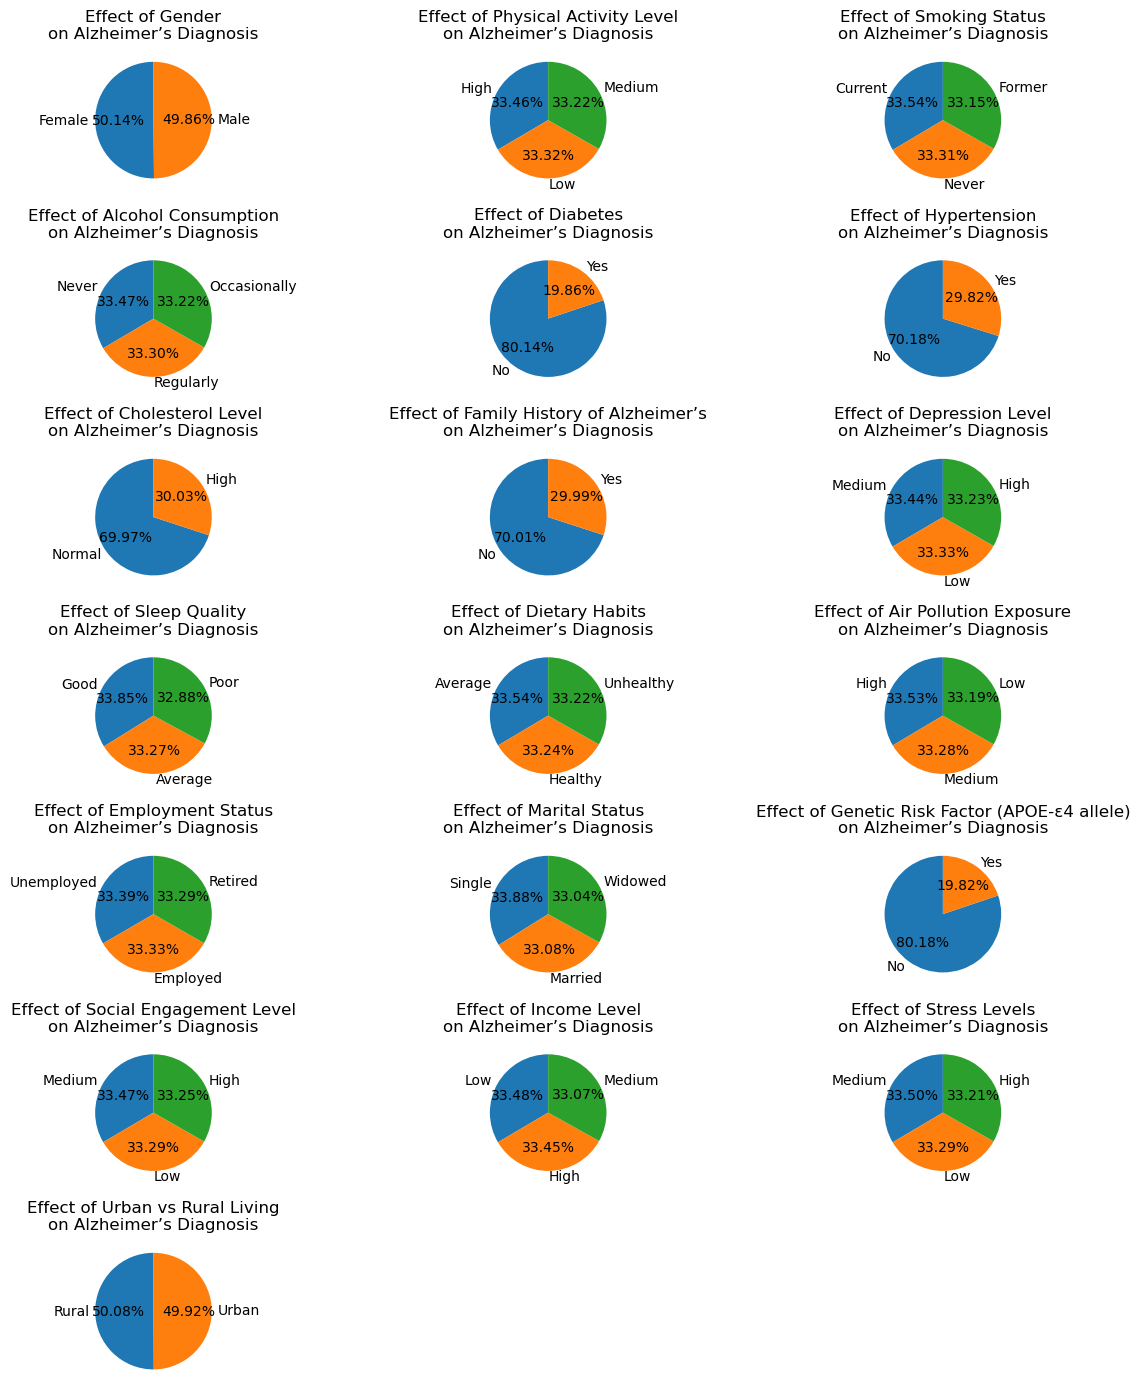

In [11]:
plt.figure(figsize=[12, 20])
i = 1

for key, value in categorical_positive_dicts.items():
    plt.subplot(10, 3, i)
    plt.pie(value.values(), labels=value.keys(), startangle=90, autopct="%.2f%%")
    plt.title("Effect of {}\non Alzheimer’s Diagnosis".format(key))
    i = i + 1

plt.tight_layout()
plt.show()

* 80,14% orang yang terdiagnosis Alzheimer tidak memiliki riwayat diabetes (nilai kolom "Diabetes" = "No")
* 70,18% orang yang terdiagnosis Alzheimer tidak memiliki riwayat hipertensi (nilai kolom "Hypertension" = "No")
* 69,97% orang yang terdiagnosis Alzheimer berkadar kolesterol normal (nilai kolom "Cholesterol Level" = "Normal")
* 70,01% orang yang terdiagnosis Alzheimer dari keluarga yang tidak memiliki riwayat diagnosis Alzheimer (nilai kolom "Family History of Alzheimer’s" = "No")
* 80,18% orang yang terdiagnosis Alzheimer tidak memiliki faktor risiko genetik (APOE-ε4 allele) (nilai kolom "Genetic Risk Factor (APOE-ε4 allele)" = "No")

### Data Preprocessing

In [12]:
X = alzheimer_df.drop(columns=["Country", "Alzheimer’s Diagnosis"], axis=1)
y = np.where(alzheimer_df["Alzheimer’s Diagnosis"] == "Yes", 1, 0)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[X.select_dtypes(include=np.number).columns] = scaler.fit_transform(X[X.select_dtypes(include=np.number).columns])

In [14]:
X["Gender"] = np.where(X["Gender"] == "Male", 1, 0)
X["Diabetes"] = np.where(X["Diabetes"] == "Yes", 1, 0)
X["Hypertension"] = np.where(X["Hypertension"] == "Yes", 1, 0)
X["Cholesterol Level"] = np.where(X["Cholesterol Level"] == "High", 1, 0)
X["Family History of Alzheimer’s"] = np.where(X["Family History of Alzheimer’s"] == "Yes", 1, 0)
X["Genetic Risk Factor (APOE-ε4 allele)"] = np.where(X["Genetic Risk Factor (APOE-ε4 allele)"] == "Yes", 1, 0)
X["Urban (1) vs Rural (0) Living"] = np.where(X["Urban vs Rural Living"] == "Urban", 1, 0)
X.drop(columns=["Urban vs Rural Living"], axis=1, inplace=True)

X = pd.get_dummies(X)

In [15]:
X = np.array(X).astype(np.float32)

In [16]:
print(X.shape)
print(y.shape)

(74283, 47)
(74283,)


### Training & Validation

Dalam proyek ini, metode klasifikasi menggunakan k-Fold Cross Validation dengan nilai k=6
<br><br>
Model yang akan digunakan untuk klasifikasi/prediksi adalah:
* Naive-Bayes (Gaussian NB)
* K-Nearest Neighbor (k=6)
* Decision Tree
* Random Forest

Metrik penilaian/evaluasi model meliputi:
* Akurasi
* Skor F1
* Presisi
* *Recall*

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

k = 6
metrics = ["accuracy", "f1", "precision", "recall"]

cv_results = list()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [18]:
def get_avg_metrics(cv_result, model_name="None"):
    avg_results = {
        "model_name" : model_name,
        "avg_accuracy" : round(np.average(cv_result["test_accuracy"]), ndigits=5),
        "avg_f1" : round(np.average(cv_result["test_f1"]), ndigits=5),
        "avg_precision" : round(np.average(cv_result["test_precision"]), ndigits=5),
        "avg_recall" : round(np.average(cv_result["test_recall"]), ndigits=5),
    }
    
    return avg_results

**Gaussian Naive-Bayes**

In [19]:
gnb_model = GaussianNB()
gnb_cv_result = cross_validate(gnb_model, X_train, y_train,
                               cv=k,
                               scoring=metrics)

cv_results.append(get_avg_metrics(gnb_cv_result, "Gaussian Naive-Bayes"))

**K-Nearest Neighbors**

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_cv_result = cross_validate(knn_model, X_train, y_train,
                               cv=k,
                               scoring=metrics)

cv_results.append(get_avg_metrics(knn_cv_result, "K-Nearest Neighbors"))

**Decision Tree**

In [21]:
dt_model = DecisionTreeClassifier(random_state=10)
dt_cv_result = cross_validate(dt_model, X_train, y_train,
                              cv=k,
                              scoring=metrics)

cv_results.append(get_avg_metrics(dt_cv_result, "Decision Tree"))

**Random Forest**

In [22]:
rf_model = RandomForestClassifier(random_state=10)
rf_cv_result = cross_validate(rf_model, X_train, y_train,
                              cv=k,
                              scoring=metrics)

cv_results.append(get_avg_metrics(rf_cv_result, "Random Forest"))

**Skor Akurasi, F1, Presisi, dan *Recall* Model**

Menampilkan hasil training dan validasi K-Fold Cross Validation terhadap model-model klasifikasi yang dipilih

In [23]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,model_name,avg_accuracy,avg_f1,avg_precision,avg_recall
0,Gaussian Naive-Bayes,0.69833,0.61599,0.64822,0.58689
1,K-Nearest Neighbors,0.59647,0.31654,0.52462,0.22668
2,Decision Tree,0.62935,0.55313,0.54995,0.55636
3,Random Forest,0.71546,0.64472,0.66443,0.62623


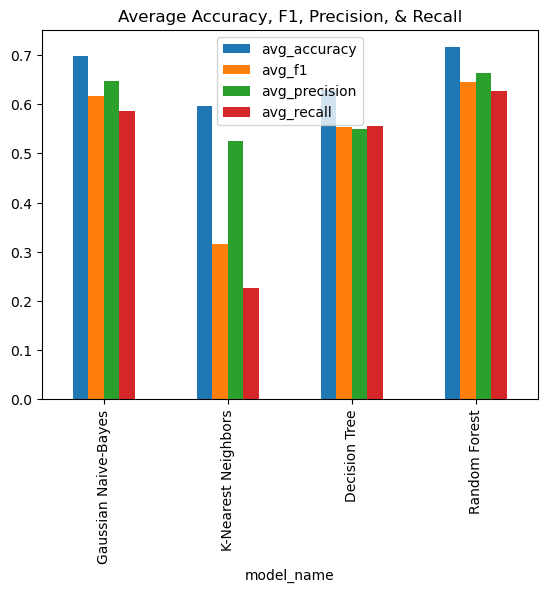

In [24]:
cv_results_df.plot(kind="bar",
                   title="Average Accuracy, F1, Precision, & Recall",
                   x="model_name",
                   y=cv_results_df.columns[1:])

plt.show()

Berdasarkan tabel dan visualisasi hasil nilai rata-rata metrik akurasi, F1, presisi, dan *recall* dari setiap model, model Random Forest memiliki nilai paling tinggi dari tiga model lainnya.
* Nilai rata-rata akurasi model Random Forest = 0,71546 (71,55%)
* Nilai rata-rata F1 model Random Forest = 0,64472
* Nilai rata-rata presisi model Random Forest = 0,66443
* Nilai rata-rata *recall* model Random Forest = 0,62623

**Klasifikasi dengan model terpilih Random Forest**

Melakukan klasifikasi terhadap dataset menggunakan model terpilih dan menerapkan *hyperparameter tuning*

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [10, 20, 30, 40, None],
    "min_samples_split": [2, 4, 8],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}

In [26]:
rf_model = RandomForestClassifier(random_state=10)

rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                               cv=k, n_iter=20, verbose=2, n_jobs=-1)
							   
rf_random.fit(X_train, y_train)

print("Best parameters found: ", rf_random.best_params_)
print("Best R-squared score:", rf_random.best_score_)

Fitting 6 folds for each of 20 candidates, totalling 120 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=  26.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=30

/opt/miniconda3/envs/raka_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  36.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  37.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  37.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  37.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  37.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=  52.6s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_fea

/opt/miniconda3/envs/raka_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/raka_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/raka_env/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/miniconda3/envs/raka_env/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_

Best parameters found:  {'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40}
Best R-squared score: 0.7202067103150364


Menampilkan hasil evaluasi model klasifikasi terpilih setelah dilakukan *hyperparameter tuning*

In [27]:
y_predict = rf_random.best_estimator_.predict(X_test)

class_report = classification_report(y_test, y_predict, output_dict=True)

macro_avg_df = pd.DataFrame({
    "model_name": "Random Forest (Tuned, Macro Avg)",
    "avg_accuracy": class_report["accuracy"],
    "avg_f1": class_report["macro avg"]["f1-score"],
    "avg_precision": class_report["macro avg"]["precision"],
    "avg_recall": class_report["macro avg"]["recall"]
}, index=[0])

weighted_avg_df = pd.DataFrame({
    "model_name": "Random Forest (Tuned, Weighted Avg)",
    "avg_accuracy": class_report["accuracy"],
    "avg_f1": class_report["weighted avg"]["f1-score"],
    "avg_precision": class_report["weighted avg"]["precision"],
    "avg_recall": class_report["weighted avg"]["recall"]
}, index=[0])

In [28]:
report_df = pd.concat(
    [cv_results_df.loc[cv_results_df["model_name"] == "Random Forest"], macro_avg_df, weighted_avg_df],
    ignore_index=True
)

report_df

,model_name,avg_accuracy,avg_f1,avg_precision,avg_recall
0,Random Forest,0.715460,0.644720,0.664430,0.626230
1,"Random Forest (Tuned, Macro Avg)",0.724305,0.716785,0.716717,0.716854
2,"Random Forest (Tuned, Weighted Avg)",0.724305,0.724349,0.724393,0.724305


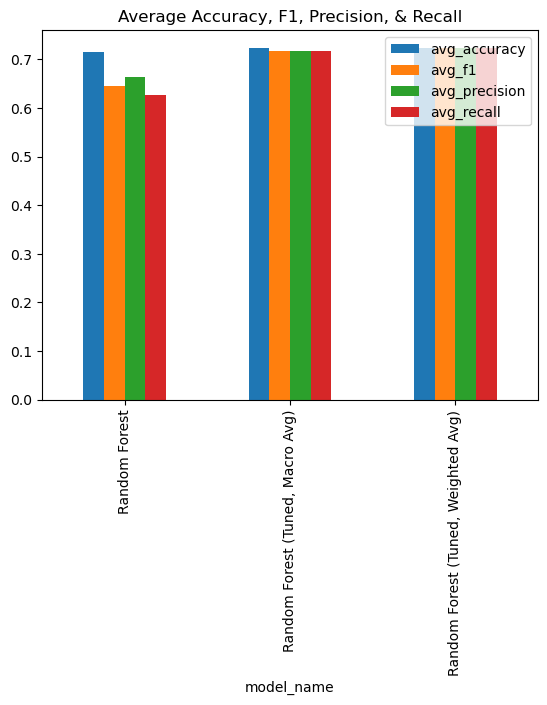

In [29]:
report_df.plot(kind="bar",
               title="Average Accuracy, F1, Precision, & Recall",
               x="model_name",
               y=report_df.columns[1:])

plt.show()

Berdasarkan evaluasi model klasifikasi terpilih setelah dilakukan *hyperparameter tuning*, nilai metrik yang diperoleh sedikit meningkat daripada sebelum dilakukan 

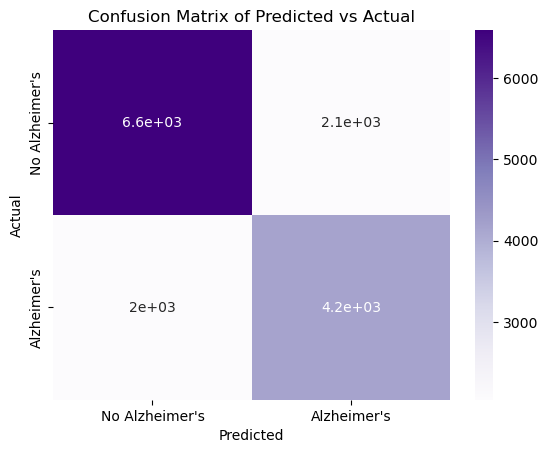

In [30]:
cf_matrix = confusion_matrix(y_test, y_predict)

sns.heatmap(cf_matrix, annot=True, cmap="Purples",
            xticklabels=["No Alzheimer's", "Alzheimer's"],
            yticklabels=["No Alzheimer's", "Alzheimer's"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Predicted vs Actual")
plt.show()